In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('matches_with_gender.csv', index_col = 0)

In [2]:
def players(df):
    return df[['winner_id', 'winner_name', 'winner_ioc', 'winner_ht', 'winner_age', 'loser_age', 'winner_hand', 'loser_hand', 'winner_entry', 'loser_entry', 'winner_rank']]

In [3]:
df.winner_age = round(df.winner_age, 0)
df.loser_age = round(df.loser_age, 0)

## Outliers

We have just seen some outliers in previous analysis. In this section we're going into deep and we try to discover outliers in each attributes and handle its. To estabilish the value of each outliers we use.

In [4]:
def detecting_outliers(attr):
    q1 = attr.quantile(0.25)
    q3 = attr.quantile(0.75)
    iqr = q3 - q1
    L = q1 - 1.5*iqr
    R = q3 + 1.5*iqr
    return L, R

In [5]:
def detecting_outliers_numerical(df, attr, substitute):
    print("BEFORE")
    #df.hist(attr) 
    plt.show()
    df.boxplot(attr) 
    plt.show()
    
    L, R = detecting_outliers(df[attr])
    print("L, R", L, R)
    if L < 0:
        L = 0

    df_outliers = df[(df[attr]< L) | (df[attr] > R)]
    new_df = df.drop(df_outliers.index)

    if substitute == 'median':
        median = df[attr].median()
        print("facciamo la mediana", median)
        df_outliers.loc[(df_outliers[attr] < L), attr] = median 
        df_outliers.loc[(df_outliers[attr] > R), attr] = median
    else:
        df_outliers.loc[(df_outliers[attr] < L), attr] = L
        df_outliers.loc[(df_outliers[attr] > R), attr] = R
    
    print("AFTER")
    new_df.append(df_outliers)
    #new_df[attr].plot.hist()
    plt.show()
    new_df[attr].plot.box()
    plt.show()
    
    return new_df 

### Players

##### winner and loser ht

As first analysis we plot the boxplot to visualize if there are some outliers inside attributes. Because players with an "outlier ht" are very few, we use external sources to find the correct values of this attribute. We verify that not all values are outliers, some of them are the real value of corresponding attribute. It could be useful to see player's age to verify if the player could grow up in ht or not.
The only wrong value are:
Ilija Vucic:       145 --> 188
Kamilla Rakhimova: 2.0 --> 174
Ivo Karlovic:      208 --> 211

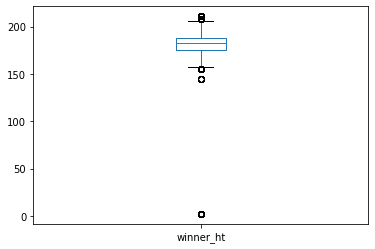

155.5 207.5
print players with possibly wrong ht
 winner_name        winner_ht
Ilija Vucic        145.0                                [26.0, 27.0]
Ivo Karlovic       208.0        [40.0, 41.0, 39.0, 38.0, 37.0, 42.0]
Kamilla Rakhimova  2.0                      [19.0, 17.0, 16.0, 18.0]
Kurumi Nara        155.0        [27.0, 26.0, 25.0, 24.0, 28.0, 29.0]
Reilly Opelka      211.0        [21.0, 22.0, 20.0, 19.0, 23.0, 24.0]
Name: winner_age, dtype: object
Players with correct value ht
 winner_name
Ilija Vucic          [188.0]
Ivo Karlovic         [211.0]
Kamilla Rakhimova    [174.0]
Kurumi Nara          [155.0]
Reilly Opelka        [211.0]
Name: winner_ht, dtype: object


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


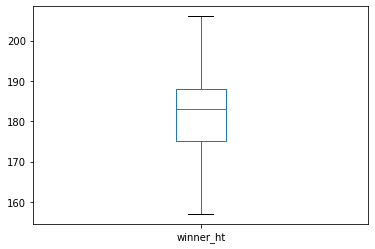

In [6]:
df.winner_ht.plot.box()
plt.show()

L, R = detecting_outliers(df.winner_ht)
print(L, R)
df_outliers = df[(df.winner_ht < L) | (df.winner_ht > R)]
new_df = df.drop(df_outliers.index)

print("print players with possibly wrong ht\n", df_outliers.groupby(['winner_name', 'winner_ht']).winner_age.unique())

df_outliers.loc[df_outliers['winner_name'] == 'Kamilla Rakhimova', 'winner_ht'] = 174 
df_outliers.loc[df_outliers['winner_name'] == 'Ilija Vucic', 'winner_ht'] = 188 
df_outliers.loc[df_outliers['winner_name'] == 'Ivo Karlovic', 'winner_ht'] = 211 

print("Players with correct value ht\n",df_outliers.groupby('winner_name').winner_ht.unique())

new_df.append(df_outliers)
df = new_df
new_df.winner_ht.plot.box()
plt.show()
#df_outliers.groupby('winner_name').winner_ht.unique()
#new_df = df.loc[df['winner_name'] == 'Kamilla Rakhimova']
#new_df.groupby(['winner_name', 'winner_ht']).winner_age.unique()

The same thing we do for losers

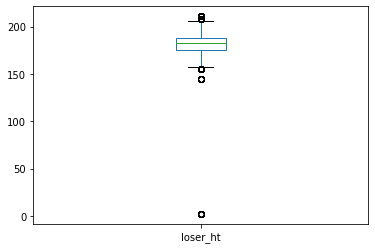

155.5 207.5
print players with possibly wrong ht
 loser_name         loser_ht
Ilija Vucic        145.0                                     [26.0, 27.0]
Ivo Karlovic       208.0             [40.0, 41.0, 39.0, 38.0, 37.0, 42.0]
Kamilla Rakhimova  2.0                     [18.0, 16.0, 15.0, 19.0, 17.0]
Kurumi Nara        155.0       [27.0, 28.0, 26.0, 25.0, 24.0, 29.0, 30.0]
Reilly Opelka      211.0             [21.0, 22.0, 20.0, 19.0, 23.0, 24.0]
Name: loser_age, dtype: object
Players with correct value ht
 loser_name
Ilija Vucic          [188.0]
Ivo Karlovic         [211.0]
Kamilla Rakhimova    [174.0]
Kurumi Nara          [155.0]
Reilly Opelka        [211.0]
Name: loser_ht, dtype: object


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


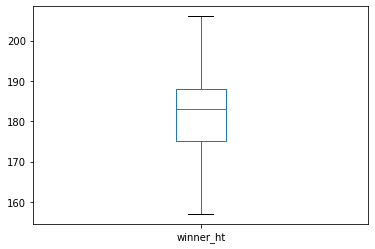

In [7]:
df.loser_ht.plot.box()
plt.show()

L, R = detecting_outliers(df.loser_ht)
print(L, R)
df_outliers = df[(df.loser_ht < L) | (df.loser_ht > R)]
new_df = df.drop(df_outliers.index)

print("print players with possibly wrong ht\n", df_outliers.groupby(['loser_name', 'loser_ht']).loser_age.unique())

df_outliers.loc[df_outliers['loser_name'] == 'Kamilla Rakhimova', 'loser_ht'] = 174 
df_outliers.loc[df_outliers['loser_name'] == 'Ilija Vucic', 'loser_ht'] = 188 
df_outliers.loc[df_outliers['loser_name'] == 'Ivo Karlovic', 'loser_ht'] = 211 

print("Players with correct value ht\n",df_outliers.groupby('loser_name').loser_ht.unique())

new_df.append(df_outliers)
df = new_df
new_df.winner_ht.plot.box()
plt.show()


#### winner_age and loser_age
Ho cambiato solo quelli che hanno un valore molto alto (come età = 95) perché tra gli altri ce ne sono molti che sono comunque corretti

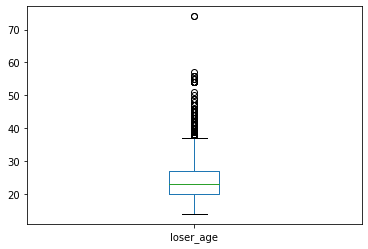

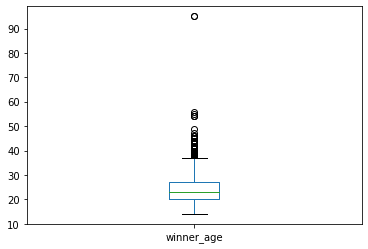

9.5 37.5


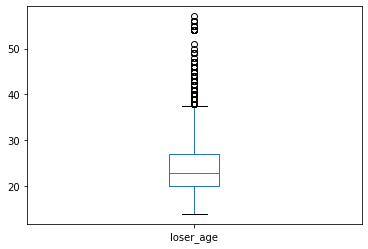

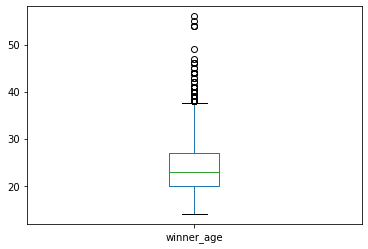

In [8]:
df.loser_age.plot.box() 
plt.show()
df.winner_age.plot.box() 
plt.show()

L, R = detecting_outliers(df.winner_age)
print(L, R)

df.loc[df['winner_age'] > 60, 'winner_age'] = R
df.loc[df['loser_age'] > 60, 'loser_age'] = R

df.loser_age.plot.box() 
plt.show()
df.winner_age.plot.box() 
plt.show()
#df_outliers = df[(df.winner_age < L) | (df.winner_age > R)]
#df_outliers.groupby('winner_age').winner_name.unique()
#df_outliers.winner_age.plot.hist() 
#plt.show()

#### winner_rank and loser_rank

In [9]:
#outliers_rank = df['winner_rank']
#outliers_rank.dropna(inplace = True)
#z_outliers_rank = stats.zscore(outliers_rank)
#z_outliers_rank = z_outliers_rank[(z_outliers_rank < -3.29) | (z_outliers_rank > 3.29)]
#z_outliers_rank
#outliers_rank

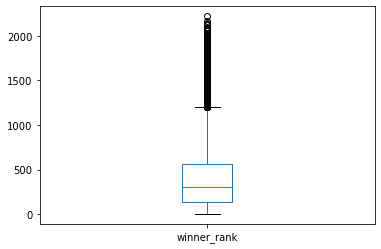

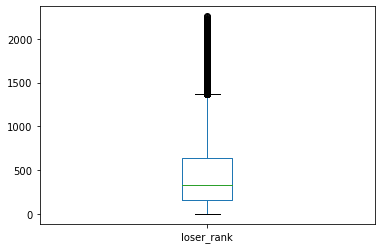

In [10]:
df.winner_rank.plot.box() 
plt.show()
df.loser_rank.plot.box() 
plt.show()
#L, R = detecting_outliers(df.winner_rank)
#print(L, R)
#df_outliers = df[(df.winner_rank < L) | (df.winner_rank > R)]
#new_df = df.drop(df_outliers.index)


#new_df.winner_rank.plot.box()

#### winner_rank_point and loser_rank_point

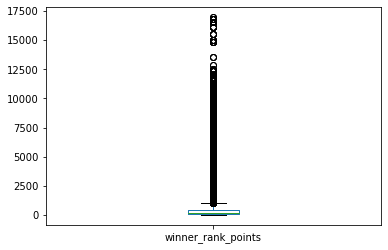

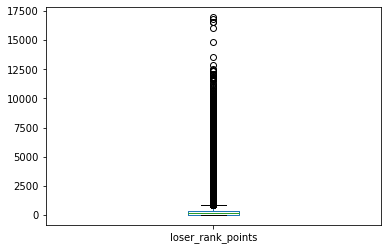

In [11]:
df.winner_rank_points.plot.box() 
plt.show()
df.loser_rank_points.plot.box() 
plt.show()

#### w_ace and l_ace

BEFORE


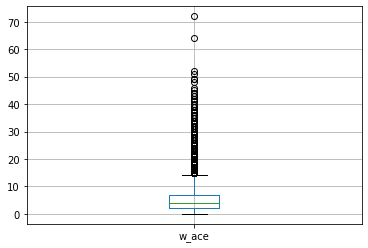

L, R -5.5 14.5
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


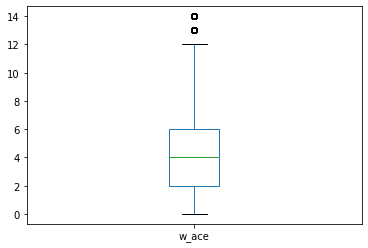

In [16]:
new_df = detecting_outliers_numerical(df, 'w_ace', 'bound')

BEFORE


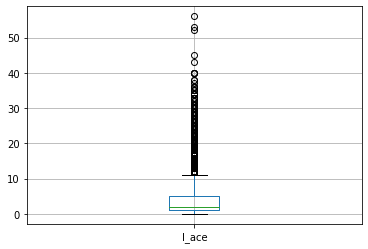

L, R -5.0 11.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


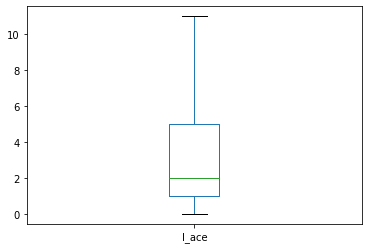

In [14]:
new_df = detecting_outliers_numerical(df, 'l_ace', 'bound')

#### w_df and l_df

BEFORE


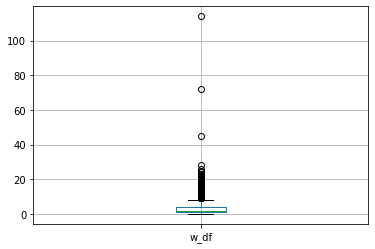

L, R -3.5 8.5
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


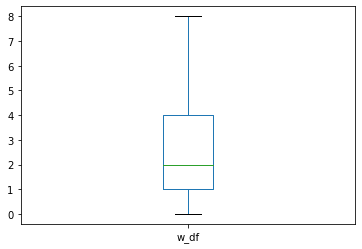

In [17]:
new_df = detecting_outliers_numerical(df, 'w_df', 'bound')

BEFORE


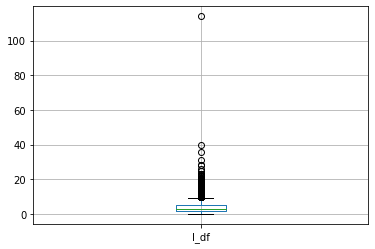

L, R -2.5 9.5
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


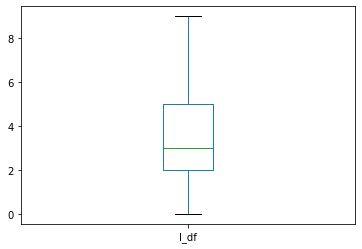

In [18]:
new_df = detecting_outliers_numerical(df, 'l_df', 'bound')

#### w_svpt and l_svpt

BEFORE


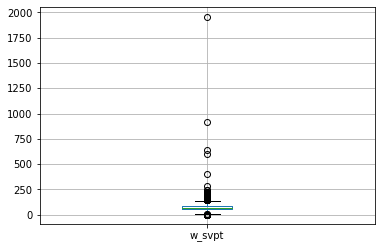

L, R 2.0 138.0
facciamo la mediana 67.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


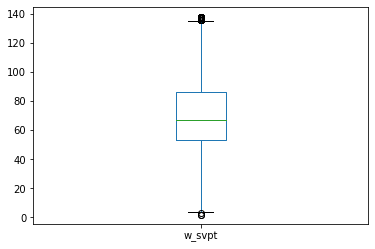

In [19]:
#new_df = detecting_outliers_numerical(df, 'w_svpt')
new_df = detecting_outliers_numerical(df, 'w_svpt', 'median')

BEFORE


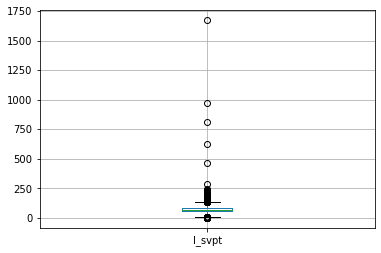

L, R 8.0 136.0
facciamo la mediana 69.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


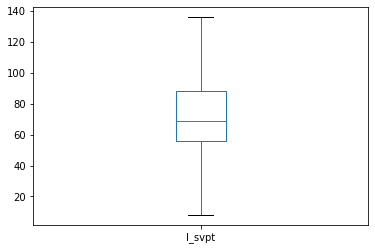

In [20]:
#new_df = detecting_outliers_numerical(df, 'l_svpt', 'bound')
new_df = detecting_outliers_numerical(df, 'l_svpt', 'median')

#### w_1stIn and l_1stIn

BEFORE


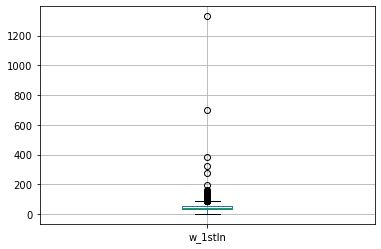

L, R -1.0 87.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


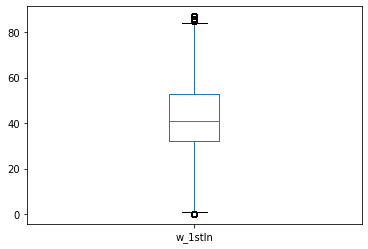

In [21]:
new_df = detecting_outliers_numerical(df, 'w_1stIn', 'bound')

BEFORE


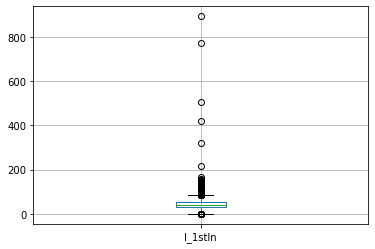

L, R 1.5 85.5
facciamo la mediana 42.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


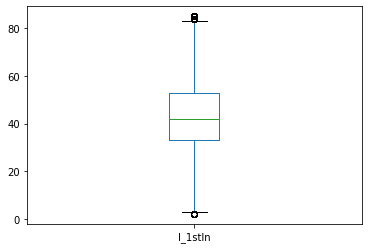

In [22]:
new_df = detecting_outliers_numerical(df, 'l_1stIn', 'median')

#### w_1stWon w_2stWon and l_1stWon l_2stWon  

BEFORE


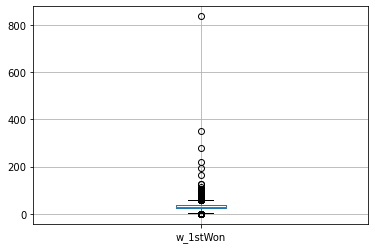

L, R 3.0 59.0
facciamo la mediana 30.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


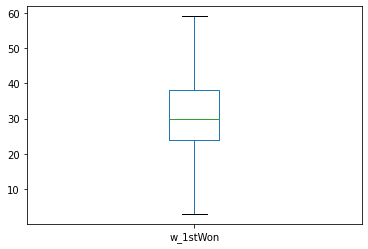

BEFORE


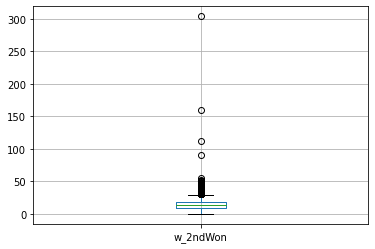

L, R -2.0 30.0
facciamo la mediana 14.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


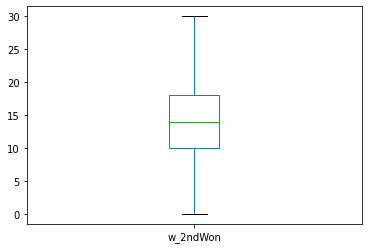

In [23]:
new_df = detecting_outliers_numerical(df, 'w_1stWon', 'median')
new_df = detecting_outliers_numerical(df, 'w_2ndWon', 'median')

BEFORE


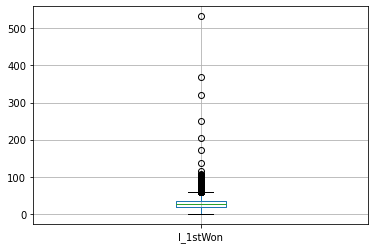

L, R -5.0 59.0
facciamo la mediana 26.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


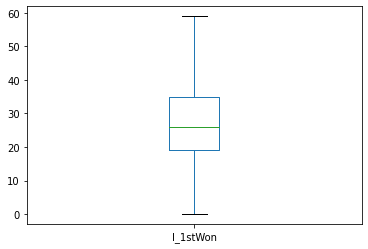

BEFORE


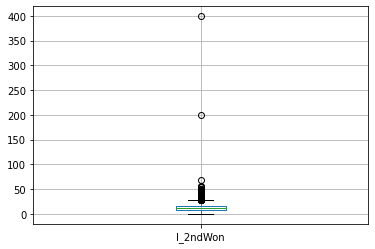

L, R -4.0 28.0
facciamo la mediana 12.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


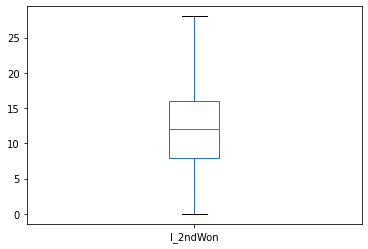

In [24]:
new_df = detecting_outliers_numerical(df, 'l_1stWon', 'median')
new_df = detecting_outliers_numerical(df, 'l_2ndWon', 'median')

#### w_SvGms and l_SvGms

BEFORE


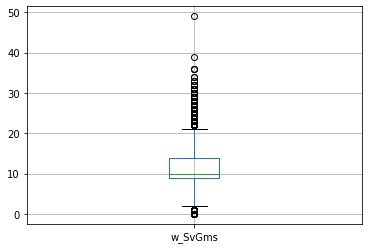

L, R 1.5 21.5
facciamo la mediana 10.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


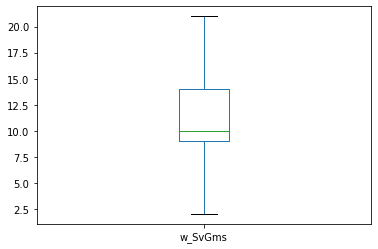

BEFORE


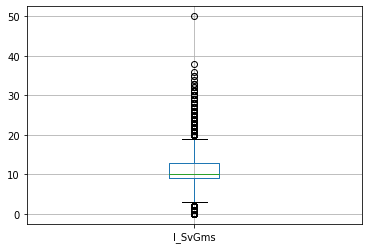

L, R 3.0 19.0
facciamo la mediana 10.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


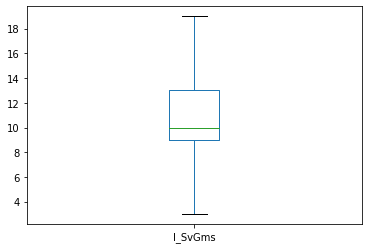

In [25]:
new_df = detecting_outliers_numerical(df, 'w_SvGms', 'median')
new_df = detecting_outliers_numerical(df, 'l_SvGms', 'median')

#### w_bpSaved w_bpFaced and l_bpSaved l_bpFaced

BEFORE


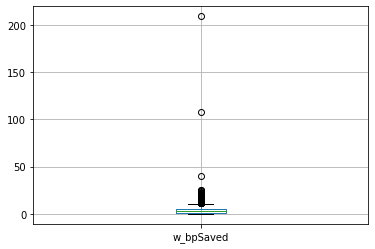

L, R -5.0 11.0
facciamo la mediana 3.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


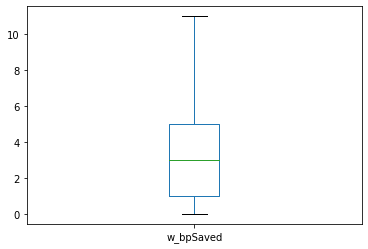

BEFORE


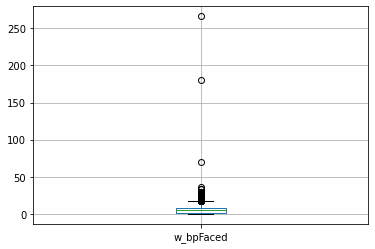

L, R -7.0 17.0
facciamo la mediana 5.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


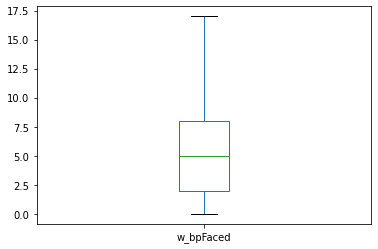

In [26]:
new_df = detecting_outliers_numerical(df, 'w_bpSaved', 'median')
new_df = detecting_outliers_numerical(df, 'w_bpFaced', 'median')

BEFORE


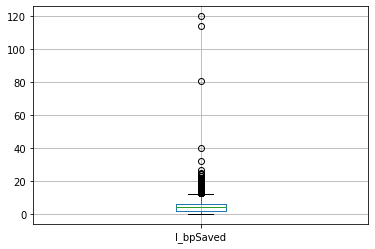

L, R -4.0 12.0
facciamo la mediana 4.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


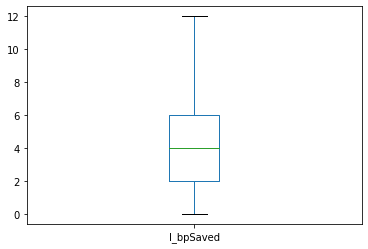

BEFORE


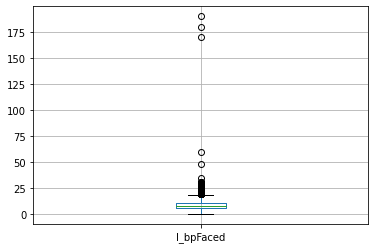

L, R -1.5 18.5
facciamo la mediana 8.0
AFTER


C:\Users\Gerlando\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


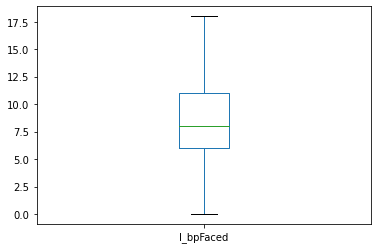

In [27]:
new_df = detecting_outliers_numerical(df, 'l_bpSaved', 'median')
new_df = detecting_outliers_numerical(df, 'l_bpFaced', 'median')

#### winner_name and loser_name

To discover if a player's name is an outlier we must count the name's occurences both in winner_name and loser_name, if its occurrences are very low then we consider it as an outlier. We assume this, also because if we have few statistics about a player then we don't have the sufficient known about him to costruct an exaustive profile. 

In [57]:
winner_names = df.groupby(df.winner_name, as_index = False).size()
winner_names= pd.DataFrame(winner_names)
winner_names.reset_index(level=0, inplace=True)

loser_names = df.groupby(df.loser_name, as_index = False).size()
loser_names= pd.DataFrame(loser_names)
loser_names.reset_index(level=0, inplace=True)

winner_names.rename( columns={'winner_name' : 'name', 0 :'freq'}, inplace = True)
loser_names.rename( columns={'loser_name' : 'name', 0 :'freq'}, inplace = True)
#print(winner_names, loser_names)
names = pd.concat([winner_names, loser_names])
#names = pd.DataFrame(names)
names = names.groupby(names.name, as_index = False).sum()
names = pd.DataFrame(names)
#print(names)
#names = names.groupby(names, as_index = False).size()
#names.set_axis(['name', 'freq'])
outliers_name = names[names['freq']<3]
outliers_name


,name,freq
0,Aada Inna,1
1,Aalisha Alexis,2
5,Aanisha Rahul Shewate,1
6,Aanisha Rahul Shewate Aanisha Rahul Shewate,1
8,Aareyalee Amrutsinh Chavan,1
...,...,...
10084,Zorayma Arreola,1
10089,Zura Tkemaladze,1
10091,Zuzana Luknarova,2
10095,Zuzanna Bednarz,2
